### NESO API

Allows us to query datasets via request.

https://data.nationalgrideso.com/api/3/action/datastore_search_sql

?sql=SELECT * FROM "{resource_id}" LIMIT 10

Get resource_ids for data sets we are interested in.

Important data sets are historical demand data, demand data update (tells us what GB used and predicted usage), and interconnector data, physical flows (shows power imports/exports from/to other countries)

Example Queries:

In [ ]:
'https://data.nationalgrideso.com/api/3/action/datastore_search_sql?sql='
SELECT * FROM "177f6fa4-ae49-4182-81ea-0c6b35f26ca6" 
WHERE "SETTLEMENT_DATE" = '2024-11-17' 
ORDER BY "SETTLEMENT_PERIOD" 
LIMIT 48

Response is JSON:

In [ ]:
{
  "success": true,
  "result": {
    "records": [
      {
        "SETTLEMENT_DATE": "2024-11-17",
        "SETTLEMENT_PERIOD": 1,
        "ND": 38542.5,
        "TSD": 36234.2
      },
      # ... more records
    ],
    "fields": [...],  # Column metadata
    "sql": "..."      # Your query echoed back
  }

In [2]:
DEMAND
├── settlement_date (PK)
├── settlement_period (PK)
├── transmission_demand_mw  -- Demand on the transmission system
├── national_demand_mw       -- Total GB demand
├── forecast_demand_mw       -- What was predicted
├── embedded_generation_mw   -- Estimated embedded wind/solar
└── timestamp_utc

INTERCONNECTOR_FLOWS
├── timestamp (PK)
├── interconnector_name (PK)  -- "IFA" (France), "BritNed" (Netherlands), etc.
├── flow_mw                    -- Positive = import, negative = export
├── direction ("import" or "export")
└── capacity_mw                -- Max capacity of this interconnector

SyntaxError: invalid character '├' (U+251C) (88419401.py, line 2)

In [16]:
# Install pandas package if you don't have it already
# pip install pandas

# Get data and convert into dataframe
import pandas as pd
import requests
from urllib import parse

sql_query = '''SELECT * FROM  "b2bde559-3455-4021-b179-dfe60c0337b0" ORDER BY "_id"'''
params = {'sql': sql_query}

try:
    resposne = requests.get('https://api.neso.energy/api/3/action/datastore_search_sql', params = parse.urlencode(params))
    data = resposne.json()["result"]
    df = pd.DataFrame(data["records"])
    print(df.info()) # Dataframe
except requests.exceptions.RequestException as e:
    print(e.response.text)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   IFA_FLOW                   14400 non-null  int64 
 1   TSD                        14400 non-null  int64 
 2   VIKING_FLOW                14400 non-null  int64 
 3   GREENLINK_FLOW             14400 non-null  int64 
 4   IFA2_FLOW                  14400 non-null  int64 
 5   EMBEDDED_WIND_GENERATION   14400 non-null  int64 
 6   ND                         14400 non-null  int64 
 7   MOYLE_FLOW                 14400 non-null  int64 
 8   NEMO_FLOW                  14400 non-null  int64 
 9   ELECLINK_FLOW              14400 non-null  int64 
 10  PUMP_STORAGE_PUMPING       14400 non-null  int64 
 11  EMBEDDED_WIND_CAPACITY     14400 non-null  int64 
 12  SETTLEMENT_DATE            14400 non-null  object
 13  ENGLAND_WALES_DEMAND       14400 non-null  int64 
 14  EMBEDD

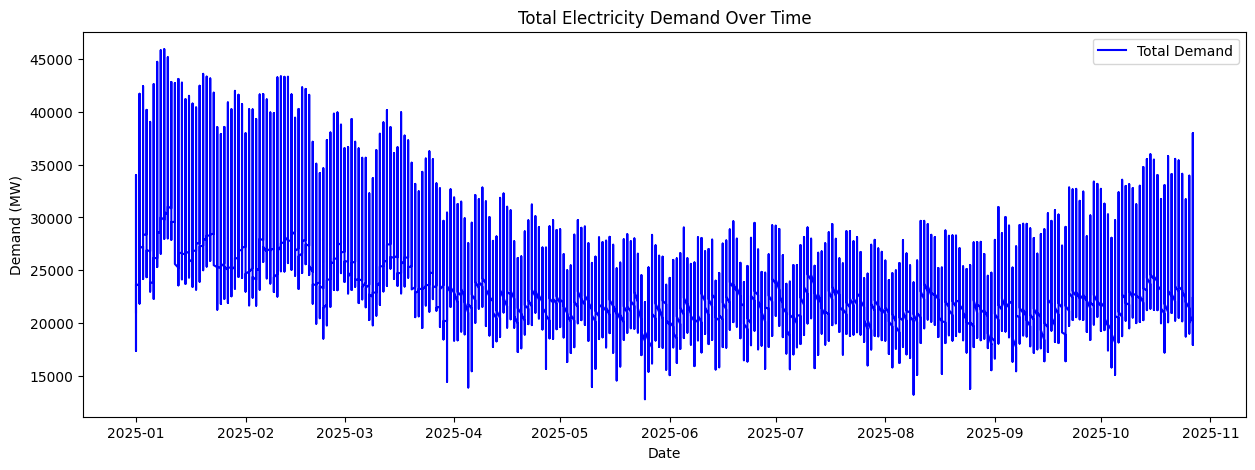

In [17]:
import matplotlib.pyplot as plt

# Assuming df has columns 'SETTLEMENTDATE' and 'TOTALDEMAND'
df['SETTLEMENT_DATE'] = pd.to_datetime(df['SETTLEMENT_DATE'])
df.set_index('SETTLEMENT_DATE', inplace=True)

plt.figure(figsize=(15,5))
plt.plot(df.index, df['ND'], label='Total Demand', color='blue')
plt.title("Total Electricity Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.legend()
plt.show()

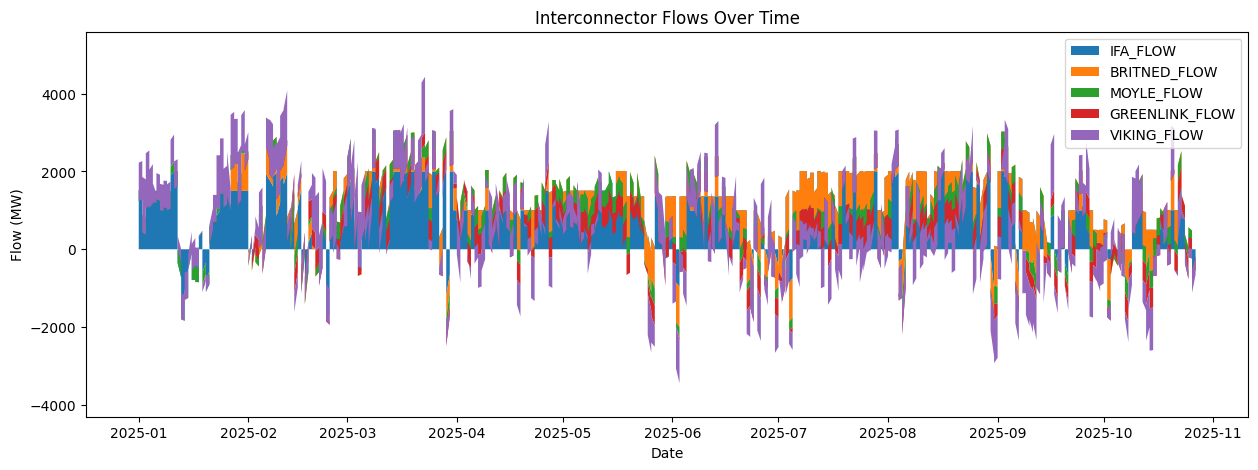

In [24]:
interconnectors = ['IFA_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'GREENLINK_FLOW', 'VIKING_FLOW']  # example columns

plt.figure(figsize=(15,5))
plt.stackplot(df.index, df[interconnectors].T, labels=interconnectors)
plt.title("Interconnector Flows Over Time")
plt.xlabel("Date")
plt.ylabel("Flow (MW)")
plt.legend()
plt.show()


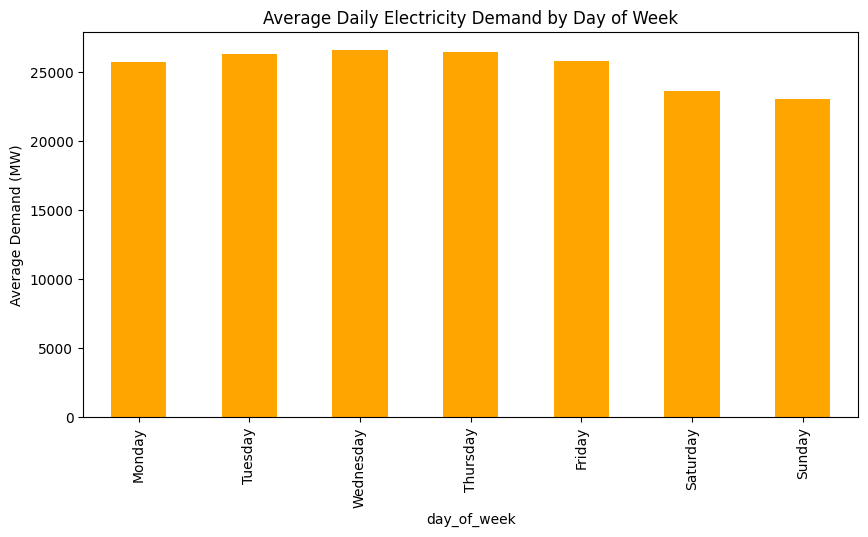

In [19]:
df['day_of_week'] = df.index.day_name()
daily_avg = df.groupby('day_of_week')['ND'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

daily_avg.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Average Daily Electricity Demand by Day of Week")
plt.ylabel("Average Demand (MW)")
plt.show()


In [9]:
# Install pandas package if you don't have it already
# pip install pandas

# Get data and convert into dataframe
import pandas as pd
import requests
from urllib import parse

sql_query = '''SELECT * FROM  "177f6fa4-ae49-4182-81ea-0c6b35f26ca6" ORDER BY "_id" ASC LIMIT 100'''
params = {'sql': sql_query}

try:
    resposne = requests.get('https://api.neso.energy/api/3/action/datastore_search_sql', params = parse.urlencode(params))
    data = resposne.json()["result"]
    df = pd.DataFrame(data["records"])
    # print(df.head()) # Dataframe
    print(df.info()) # Summary statistics
except requests.exceptions.RequestException as e:
    print(e.response.text)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   IFA_FLOW                   100 non-null    int64 
 1   TSD                        100 non-null    int64 
 2   VIKING_FLOW                100 non-null    int64 
 3   GREENLINK_FLOW             100 non-null    int64 
 4   FORECAST_ACTUAL_INDICATOR  100 non-null    object
 5   IFA2_FLOW                  100 non-null    int64 
 6   EMBEDDED_WIND_GENERATION   100 non-null    int64 
 7   ND                         100 non-null    int64 
 8   MOYLE_FLOW                 100 non-null    int64 
 9   NEMO_FLOW                  100 non-null    int64 
 10  ELECLINK_FLOW              100 non-null    int64 
 11  PUMP_STORAGE_PUMPING       100 non-null    int64 
 12  EMBEDDED_WIND_CAPACITY     100 non-null    int64 
 13  SETTLEMENT_DATE            100 non-null    object
 14  ENGLAND_WAL